In [76]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

df = pd.read_csv("/kaggle/input/stockcsv/stock.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
df= df.interpolate(method='linear')
dataset=df
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...
2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0


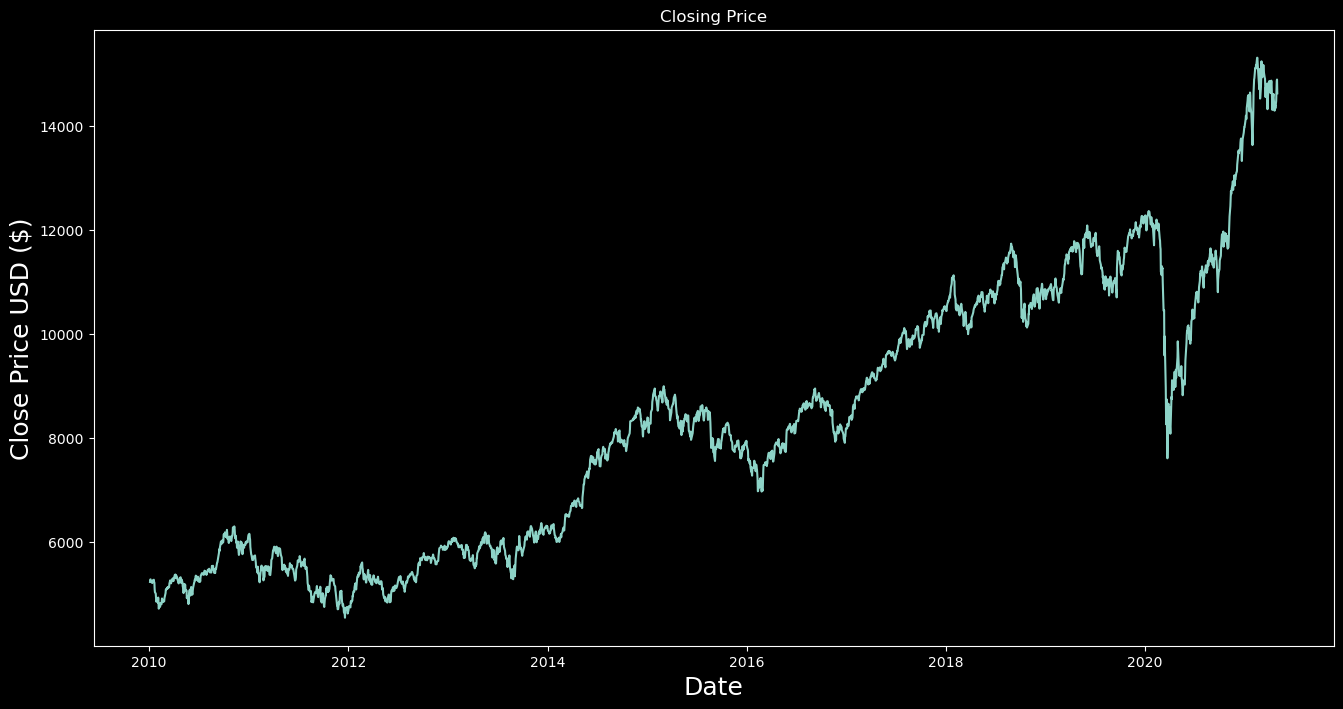

In [77]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [78]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

2156

In [79]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.95820525],
       [0.96102318],
       [0.93653028]])

In [80]:
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i<=50:
        print(x_train)
        print(y_train)
        print()

[array([0.06387819, 0.06812123, 0.06848332, 0.06674712, 0.06504339,
       0.06547511, 0.06185411, 0.06404067, 0.06645   , 0.06573511,
       0.06783807, 0.06327002, 0.0629033 , 0.05106074, 0.04566174,
       0.04305276, 0.02868018, 0.02999395, 0.03136805, 0.03300682,
       0.02654472, 0.03599182, 0.02796062, 0.01619699, 0.01813516,
       0.02007332, 0.02306761, 0.01977624, 0.02624297, 0.02393111,
       0.02892622, 0.03433451, 0.03189729, 0.02791883, 0.02898656,
       0.0302539 , 0.02919084, 0.0292976 , 0.03510511, 0.04389767,
       0.05049904, 0.04977019, 0.05055476, 0.05383221, 0.05174317,
       0.05311265, 0.05470495, 0.05503921, 0.05428715, 0.06071212])]
[0.06671924327249462]



In [48]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2106, 50, 1)

In [72]:
from keras.layers import Conv1D, GRU, Dense
from keras.models import Sequential

timesteps = 50  # Define the number of timesteps in your input sequence
features = 1  # Define the number of features in each timestep

model = Sequential()

# Add Convolutional GRU layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))
model.add(GRU(units=64, return_sequences=True))
model.add(GRU(units=64, return_sequences=True))  # Return sequences to match the expected input shape
model.add(GRU(units=64))

# Add output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x=x_train, y=y_train, batch_size=128, epochs=30)


Epoch 1/30
17/17 [==============================] - 8s 129ms/step - loss: 0.0202
Epoch 2/30
17/17 [==============================] - 2s 131ms/step - loss: 0.0017
Epoch 3/30
17/17 [==============================] - 3s 151ms/step - loss: 4.5740e-04
Epoch 4/30
17/17 [==============================] - 2s 131ms/step - loss: 2.2449e-04
Epoch 5/30
17/17 [==============================] - 2s 128ms/step - loss: 1.9242e-04
Epoch 6/30
17/17 [==============================] - 2s 135ms/step - loss: 1.7452e-04
Epoch 7/30
17/17 [==============================] - 2s 127ms/step - loss: 1.6902e-04
Epoch 8/30
17/17 [==============================] - 2s 130ms/step - loss: 1.6595e-04
Epoch 9/30
17/17 [==============================] - 2s 130ms/step - loss: 1.6589e-04
Epoch 10/30
17/17 [==============================] - 2s 131ms/step - loss: 1.6124e-04
Epoch 11/30
17/17 [==============================] - 2s 129ms/step - loss: 1.5805e-04
Epoch 12/30
17/17 [==============================] - 2s 131ms/step - lo

In [81]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-50: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i,0])


In [82]:
#Convert the data to a numpy array

x_test=np.array(x_test)
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

17/17 [==============================] - 0s 18ms/step


31.095955479786216

/tmp/ipykernel_33/2837676630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'predictions'] = predictions


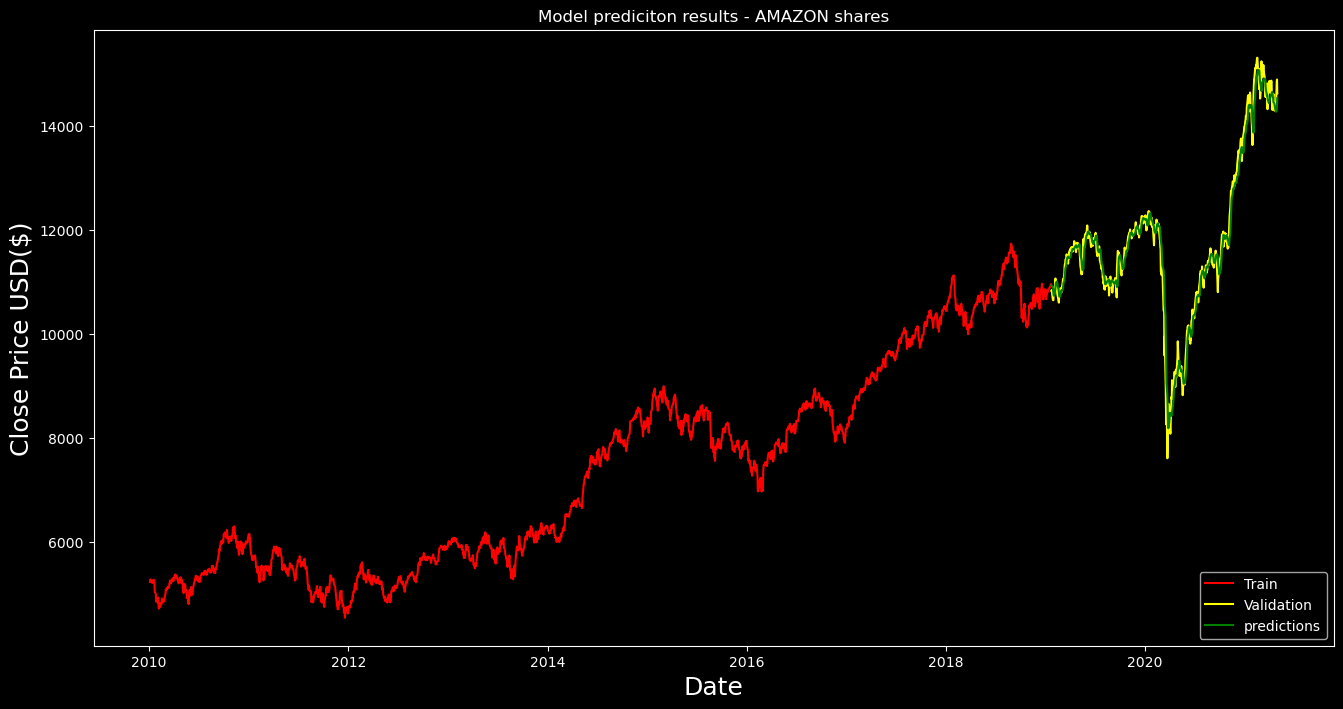

In [90]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid.loc[:, 'predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - AMAZON shares')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')

plt.show()

In [91]:
#Show the valid and predicted prices

valid.tail(15)

,Close,predictions
Date,,
2021-04-08,14873.79981,14601.863281
2021-04-09,14834.84961,14627.749023
2021-04-12,14310.79981,14660.227539
2021-04-13,14504.79981,14599.170898
2021-04-15,14581.45020,14528.469727
2021-04-16,14617.84961,14456.602539
2021-04-19,14359.45020,14438.460938
2021-04-20,14296.40039,14408.918945
2021-04-22,14406.15039,14361.599609


In [92]:
data=pd.read_csv("/kaggle/input/sample-input/sample_input.csv")
new_df=data.filter(['Close'])
new_df= new_df.interpolate(method='linear')

#Get last 60 days values and convert into array
last_60_days=new_df[:].values

last_60_days


array([[6221.450195 ],
       [6297.950195 ],
       [6526.649902 ],
       [6537.25     ],
       [6511.899902 ],
       [6516.899902 ],
       [6493.100098 ],
       [6504.200195 ],
       [6516.649902 ],
       [6524.049805 ],
       [6483.100098 ],
       [6493.200195 ],
       [6538.3500975],
       [6583.5      ],
       [6589.75     ],
       [6601.399902 ],
       [6641.75     ],
       [6695.899902 ],
       [6704.200195 ],
       [6721.049805 ],
       [6752.549805 ],
       [6736.100098 ],
       [6694.350098 ],
       [6695.049805 ],
       [6796.200195 ],
       [6796.399902 ],
       [6776.299805 ],
       [6733.100098 ],
       [6675.299805 ],
       [6779.399902 ],
       [6817.649902 ],
       [6815.350098 ],
       [6840.799805 ],
       [6811.7749025],
       [6782.75     ],
       [6761.25     ],
       [6715.25     ],
       [6696.399902 ],
       [6694.799805 ],
       [6699.350098 ],
       [6715.299805 ],
       [6652.549805 ],
       [6659.850098 ],
       [685

In [93]:

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data into a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get predicted scaled price for tomorrow
pred_price_tomorrow = model.predict(X_test)
# Undo the scaling
pred_price_tomorrow = scaler.inverse_transform(pred_price_tomorrow)

# Append the predicted price for tomorrow to the last 60 days data
next_60_days = np.append(last_60_days[1:], pred_price_tomorrow)

# Scale the updated data
next_60_days_scaled = scaler.transform(next_60_days.reshape(-1, 1))

# Create a new list for the day after tomorrow prediction
X_test_next = []
# Append the updated 60 days data
X_test_next.append(next_60_days_scaled)

# Convert the X_test_next data into a numpy array
X_test_next = np.array(X_test_next)

# Reshape the data
X_test_next = np.reshape(X_test_next, (X_test_next.shape[0], X_test_next.shape[1], 1))

# Get predicted scaled price for the day after tomorrow
pred_price_day_after = model.predict(X_test_next)
# Undo the scaling
pred_price_day_after = scaler.inverse_transform(pred_price_day_after)

print(f'Price of tomorrow: {pred_price_tomorrow}')
print(f'Price of the day after tomorrow: {pred_price_day_after}')

1/1 [==============================] - 0s 35ms/step
Price of tomorrow: [[7171.642]]
Price of the day after tomorrow: [[7207.796]]


In [95]:


def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('/kaggle/input/sample-input/sample_input.csv')
     
    actual_close = np.loadtxt('/kaggle/input/sample-txt/sample_close.txt')
    
    pred_close = predict_func(df)
 
  
    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close
    
    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Directional Accuracy: {dir_accuracy:.1f}')


def predict_func(df):
  
    print(f'Price of tomorrow: {pred_price_tomorrow}')
    print(f'Price of the day after tomorrow: {pred_price_day_after}')
    ans = [pred_price_tomorrow[0][0], pred_price_day_after[0][0]]
    return ans

if __name__== "__main__":
    
    evaluate()

Price of tomorrow: [[7171.642]]
Price of the day after tomorrow: [[7207.796]]
Directional Accuracy: 100.0
